<a href="https://colab.research.google.com/github/mockingjay14/ml_scripts/blob/main/examples/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn Train Test Split Examples

## Installation
Numpy, matplotlib, and seaborn are already installed by default

In [1]:
!pip list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.12

In [5]:
# Import

import numpy as np
import pandas as pd

## Example Data

In [6]:
# Downloading Data from URL

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

# Downloads fetched data and extracts the housing.csv in the directory
fetch_housing_data()

In [7]:
# Loading of Data to Pandas Dataframe

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [8]:
# Loading of the Dataset

housing = load_housing_data()

## Adding a Category for Stratified Sampling

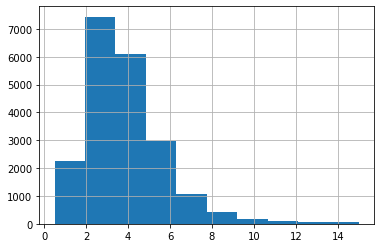

In [9]:
housing["median_income"].hist()  # Based on domain knowledge, median income is correlated with house prices

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])  # 1 = [0 to 1.5], 2 = (1.5 to 3.0], ...

In [11]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

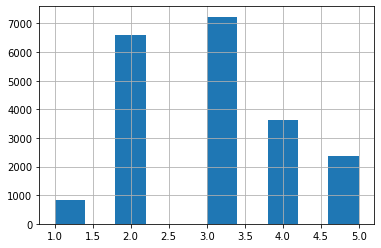

In [12]:
housing["income_cat"].hist()

In [13]:
# Stratified Sampling Example

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
# Comparison of Proportions of Original and Test Set

print("Original Dataset Proportions")
print(housing["income_cat"].value_counts() / len(housing))

print("=========================")

print("Test Dataset Propertions")
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

Original Dataset Proportions
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Test Dataset Propertions
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [15]:
# Remove the Additional Category to Retain Original Dataset

housing.drop("income_cat", axis=1, inplace=True)

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)  # The additional category has served its purpose for the stratified sampling

## Adding Attribute Combinations

In [16]:
# Copying the Dataset
X = housing.copy()

# Combination of Attributes
X["rooms_per_household"] = X["total_rooms"]/X["households"]  # Indexing a new attribute, automatically creates a new column
X["bedrooms_per_room"] = X["total_bedrooms"]/X["total_rooms"]
X["population_per_household"] = X["population"]/X["households"]

In [17]:
# Inspecting the Correlation Matrix

corr_matrix = X.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Dealing with Missing Values

In [18]:
# Copying the Dataset
X = housing.copy()

# X.dropna(subset=["total_bedrooms"]) # option 1, drops the row or instance with NaN values
# X.drop("total_bedrooms", axis=1) # option 2, drops the column or whole attribute
median = housing["total_bedrooms"].median() 
X["total_bedrooms"].fillna(median, inplace=True) # option 3, fills the NaNs with a certain value

In [19]:
# Using a Simple Imputer

# Copying the Dataset
X = housing.copy()
X_num = X.drop("ocean_proximity", axis=1)  # Dropping the categorical attribute since imputer works on numerical attributes only

# Sklean Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(X_num)

# Results
print('Imputer Results:')
print(imputer.statistics_)
print('=========================')
print('Imputer Results:')
print(X_num.median().values)

Imputer Results:
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]
Imputer Results:
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]


In [20]:
# Trained Imputer for Replacing Values

temp = imputer.transform(X_num)  # Output is an numpy array
X_tr = pd.DataFrame(temp, columns=X_num.columns, index=X_num.index)  # Converting to pandas dataframe

## Handling Text and Categorical Variables

In [21]:
# Separating Categorical Attribute

housing_cat = strat_train_set[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Ordinal Encoder
Transforms categorical variable by index

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One Hot Encoder
Value of 1 for the categorical attribute but 0 for the rest

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [26]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformer

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [28]:
# Converting to Pandas Dataframe and Adding Column Names

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.80226
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467


## Normalization and Standardization

### Min Max Scaler
Values are ranging from 0 to 1

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example Data
data = np.array([[100, 0.001],
                 [8, 0.05],
                 [50, 0.005],
                 [88, 0.07],
                 [4, 0.1]])
print("Original Data:")
print(data)

# Define Min Max Scaler
scaler = MinMaxScaler()

# Transform the Data
scaled = scaler.fit_transform(data)
print('=========================')
print("Scaled Data:")
print(scaled)

Original Data:
[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
Scaled Data:
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


### Standard Scaler
Values are centered at 0 mean and may range from negative to positive values

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example Data
data = np.array([[100, 0.001],
                 [8, 0.05],
                 [50, 0.005],
                 [88, 0.07],
                 [4, 0.1]])
print("Original Data:")
print(data)

# Define Standard Scaler
scaler = StandardScaler()

# Transform the Data
scaled = scaler.fit_transform(data)
print('=========================')
print("Scaled Data:")
print(scaled)

Original Data:
[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
Scaled Data:
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


## Transformation Pipelines

In [36]:
# Whole Dataset Transform

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                         ])

housing_num_tr = num_pipeline.fit_transform(X_num)
housing_num_tr = housing_extra_attribs = pd.DataFrame(
    housing_num_tr,
    columns=list(X_num.columns)+["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=X_num.index)
housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597,-1.029988
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512,-0.888897
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843,-1.291686
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329,-0.449613
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616,-0.639087


In [58]:
# Handle Numerical and Categorical Attributes Together

from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
                                   ])
                                   
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared_tr = housing_extra_attribs = pd.DataFrame(
    housing_prepared,
    columns=list(X_num.columns)+["rooms_per_household", "population_per_household", "bedrooms_per_room"] + list(housing["ocean_proximity"].unique()),
    index=X_num.index+len(housing["ocean_proximity"].value_counts()))
housing_prepared_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
5,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597,-1.029988,0.0,0.0,0.0,1.0,0.0
6,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512,-0.888897,0.0,0.0,0.0,1.0,0.0
7,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843,-1.291686,0.0,0.0,0.0,1.0,0.0
8,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329,-0.449613,0.0,0.0,0.0,1.0,0.0
9,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616,-0.639087,0.0,0.0,0.0,1.0,0.0
